In [37]:
!pip install langdetect

In [38]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from langdetect import detect
import string

In [39]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
df = pd.read_excel('dataset.xlsx')
df

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
...,...,...,...
1435,Excellent mobile,5,Excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve..."
1437,Good value for money,5,Battery life is good but camera clarity could ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied....."


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [42]:
df.shape

(1440, 3)

In [43]:
df.columns

Index(['title', 'rating', 'body'], dtype='object')

In [44]:
df.isnull().sum()

,0
title,0
rating,0
body,0


In [45]:
df.describe()

,rating
count,1440.000000
mean,3.173611
std,1.584453
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [46]:
df.dtypes

,0
title,object
rating,int64
body,object


In [47]:
data = df[df['body'].apply(lambda x: detect(x) != 'hi')]
data

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
...,...,...,...
1435,Excellent mobile,5,Excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve..."
1437,Good value for money,5,Battery life is good but camera clarity could ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied....."


In [48]:
#Distinct values of rating and its count
print(f"rating value count: \n{data['rating'].value_counts()}")

rating value count: 
rating
5    418
1    378
4    309
3    199
2    125
Name: count, dtype: int64


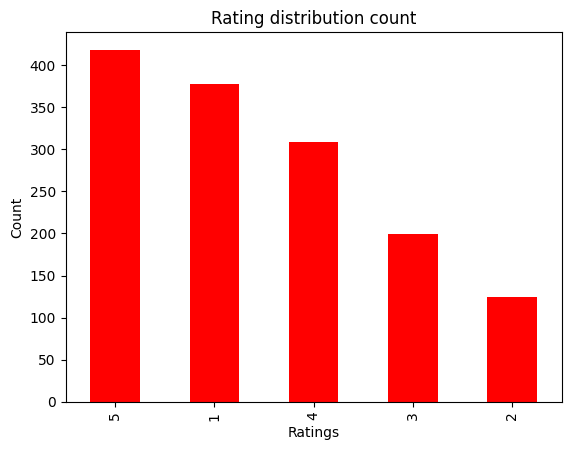

In [49]:
#Bar plot to visualize the total counts of each rating
data['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [50]:
# Sentiment Mapping
def get_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [51]:
df['sentiment'] = df['rating'].apply(get_sentiment)
df['sentiment']

,sentiment
0,Negative
1,Neutral
2,Positive
3,Negative
4,Negative
...,...
1435,Positive
1436,Negative
1437,Positive
1438,Negative


In [52]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [53]:
df['clean_body'] = df['body'].astype(str).apply(clean_text)

In [56]:
text_data = {
    sentiment: " ".join(df[df['sentiment'] == sentiment]['clean_body'])
    for sentiment in ['Positive', 'Neutral', 'Negative']
}


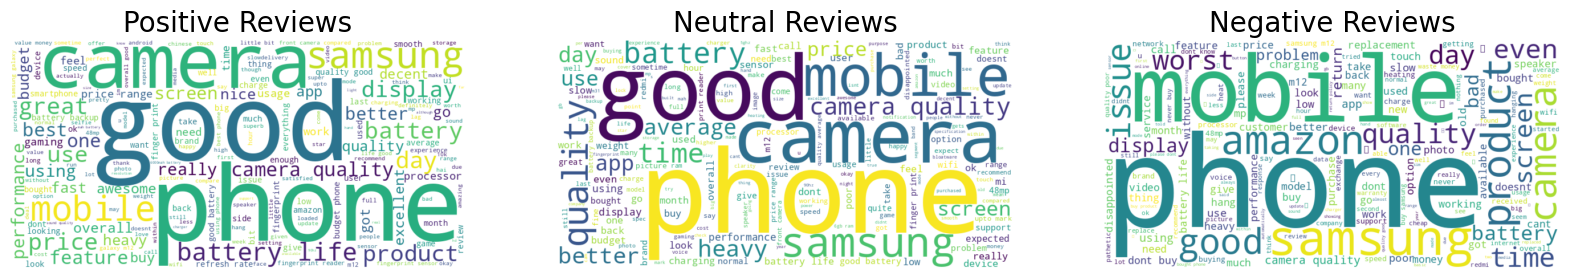

In [60]:
plt.figure(figsize=(20, 8))
for i, (sentiment, text) in enumerate(text_data.items(), 1):
    plt.subplot(1, 3, i)
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'{sentiment} Reviews', fontsize=20)
    plt.axis('off')
